# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [ ]:
! git clone https://github.com/namithatholasi/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 106 (delta 36), reused 30 (delta 30), pack-reused 63 (from 1)
Receiving objects: 100% (106/106), 406.89 KiB | 4.11 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Download complete
Extracting data files...
Data extracted


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [ ]:
#Q1.1
import pandas as pd
import numpy as np
df_airbnb = pd.read_csv("/content/data/airbnb_NYC.csv", encoding="latin1")
df_airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
#Q1.1 Check datatype first
df_airbnb['Price'].dtype

dtype('O')

In [ ]:
#Q1.1 Clean price by removing commmas and converting to a numeric value
df_airbnb["Price_clean"] = (
    df_airbnb["Price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)
df_airbnb["Price_clean"] = pd.to_numeric(df_airbnb["Price_clean"], errors="coerce")

In [ ]:
#Q1.1 Count missing values (prices)
missing_prices = df_airbnb["Price_clean"].isna().sum()
missing_prices

np.int64(0)

**Q1.1 Answer:**

**Initially, the price variable was stored as an object rather than a numeric type. Prices that were over 999 dollars included commas which prevented proper conversion to numeric values. So, I decided to remove the commas first, any non-numeric formatting (like dollar signs), and then converted the price variable to a numeric variable. After cleaning, I ended up with 0 missing values.**

In [ ]:
#Q1.2
df_mn = pd.read_csv("/content/data/mn_police_use_of_force.csv")

# Standardize to lowercase strings
df_mn["subject_injury_clean"] = df_mn["subject_injury"].astype(str).str.lower().str.strip()

In [ ]:
#Q1.2

# Map different patterns to Yes/No
yes_vals = ["yes", "y", "injury", "injured"]
no_vals = ["no", "n", "none", "no injury"]

df_mn["subject_injury_clean"] = df_mn["subject_injury_clean"].replace({
    val: "Yes" for val in yes_vals
}).replace({
    val: "No"  for val in no_vals
})

#Convert anything else to NaN
df_mn["subject_injury_clean"] = df_mn["subject_injury_clean"].where(
    df_mn["subject_injury_clean"].isin(["Yes", "No"]),
    other=pd.NA
)

In [ ]:
#Q1.2
missing_prop = df_mn["subject_injury_clean"].isna().mean()
missing_prop

np.float64(0.7619342359767892)

In [ ]:
#Q1.2
pd.crosstab(df_mn["subject_injury_clean"], df_mn["force_type"], dropna=False)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_clean,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


In [ ]:
#Q1.2
df_mn["subject_injury_clean"] = df_mn["subject_injury_clean"].fillna("Missing")

**Q1.2 Answer**

**The  proportion of values that were missing after my cleaning of subject_injury_clean was around 76.2 percent. The missing values aren't necessarily evenly distributed across the different force types. A lot of the missing values take place across, for example, Bodily Force, Chemical Irritants, Taser, and Maximal Restraint Technique. In a sense, there is a clear pattern that missing values are more likely to be missing for certain types of force than across all of them.**

In [ ]:
#Q1.3

df_meta = pd.read_csv("/content/data/metabric.csv")

#Standardize the text
df_meta["Overall Survival Status"] = (
    df_meta["Overall Survival Status"]
    .astype(str)
    .str.split(":")
    .str[-1]
    .str.lower()
    .str.strip()
)

#Create a dummy variable
df_meta["overall_survival_dummy"] = df_meta["Overall Survival Status"].map({
    "living": 1,
    "deceased": 0

})

In [ ]:
#Q1.4
df_airbnb = pd.read_csv("/content/data/airbnb_NYC.csv", encoding="latin1")

#Count missing values
missing_count = df_airbnb["Review Scores Rating"].isna().sum()
missing_count

np.int64(8323)

In [ ]:
#Q1.4

#Impute missing values with the median
median_rating = df_airbnb["Review Scores Rating"].median()
df_airbnb["Review Scores Rating Imputed"] = df_airbnb["Review Scores Rating"].fillna(median_rating)

**Q1.4 Answer:**

**Imputing missing values with the median can cause bias in the data because it reduces natural variability in the data. When all missing values are replaced with the same number, it distorts true distribution of review scores. If the missingness was not random, then it can shift those missing values to the middle of the distribution, which is not an accurate representation of the data. This can lead to misleading conclusions, and affect any models that are built on this now distorted data.**

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [ ]:
#Q2.1
import pandas as pd
df_shark = pd.read_excel("/content/data/GSAF5.xls")
df_shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Q2.1 Answer:**

**Since the shark attack dataset is an Excel file, read_csv would not work. I decided to use pd.read_excel to open the file. bold text**

In [ ]:
#Q2.2
df_shark = df_shark.dropna(axis=1, how="all")

**Q2.3 Answer:**

**An observation in this case is one shark attack incident. Each row is on incident. It contains the details of the shark attack including the data, type, year, and more. Knowing what an observation is helps us conduct cleaning and analysis at each individual attack level, not the victim or the shark.**

In [ ]:
#Q2.4

#Clean the Year column
df_shark["Year"] = pd.to_numeric(df_shark["Year"], errors="coerce")

In [ ]:
#Q2.4

#Look at the range of years
df_shark["Year"].min(), df_shark["Year"].max()

(0.0, 2026.0)

In [ ]:
#Q2.4

#Filter to attacks since 1940
df_recent = df_shark[df_shark["Year"] >= 1940]

In [ ]:
#Q2.4

#Count attacks per year to see trend
attacks_per_year = df_recent.groupby("Year").size()
attacks_per_year

,0
Year,
1940.0,24
1941.0,27
1942.0,41
1943.0,28
1944.0,31
...,...
2022.0,98
2023.0,109
2024.0,52


**Q2.4 Answer:**

**After cleaning the Year variable, the values ranged from 0 to 2026. 0 likely represents some missing or invalid entries. 2026 could be an error since the year just started.**

**After filtering attacks from 1940, the number of attacks demonstrated an upward trend, with high counts in recent years. The slight drop from 2025-2026 is likely due to incomplete reporting. So, we can safely say that shark attacks are increasing over time as more people spend time in the water.**

<Axes: >

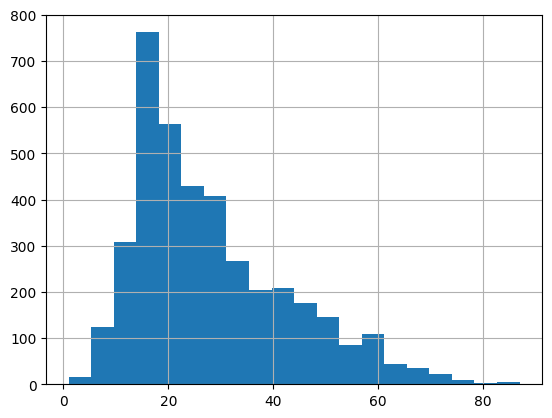

In [ ]:
#Q2.5

#Clean the age variable
df_shark["Age_clean"] = pd.to_numeric(df_shark["Age"], errors="coerce")

#Make a histogram
df_shark["Age_clean"].hist(bins=20)

In [ ]:
#Q2.6

#Standardize the text (Lowercase everything and strip spaces)
df_shark["Type_clean"] = df_shark["Type"].str.lower().str.strip()

#Map valid categories
df_shark["Type_clean"] = df_shark["Type_clean"].replace({
    "unprovoked": "Unprovoked",
    "provoked": "Provoked"

})

#Everything else becomes unknown
df_shark["Type_clean"] = df_shark["Type_clean"].where(
    df_shark["Type_clean"].isin(["Unprovoked", "Provoked"]),
    "Unknown"
)

#Calculate the proportion of unprovoked attacks
(df_shark["Type_clean"] == "Unprovoked").mean()

np.float64(0.7387247278382582)

**Q2.6 Answer:**

**Around 73.9% of shark attacks are unprovoked.**

In [ ]:
#Q2.7

#Standardize the text (Lowercase and strip spaces)
df_shark["Fatal_clean"] = df_shark["Fatal Y/N"].astype(str).str.lower().str.strip()

#Map valid entries
df_shark["Fatal_clean"] = df_shark["Fatal_clean"].replace({
    "y": "Y",
    "n": "N"
})

#Everything else becomes Unknown
df_shark["Fatal_clean"] = df_shark["Fatal_clean"].where(
    df_shark["Fatal_clean"].isin(["Y", "N"]),
    "Unknown"
)

In [ ]:
#Q2.8
df_shark.groupby("Type_clean")["Fatal_clean"].value_counts(normalize=True)

Type_clean  Fatal_clean
Provoked    N              0.953416
            Y              0.032609
            Unknown        0.013975
Unknown     Unknown        0.460963
            N              0.372924
            Y              0.166113
Unprovoked  N              0.742201
            Y              0.242679
            Unknown        0.015120
Name: proportion, dtype: float64

**Q2.8 Answer:**

**In comparing the fatality rates, it is clear that provoked attacks are fatal around 3.3% of the time, and unprovoked attacks are fatal around 24.3% of the time. It clearly indicates the trend of unprovoked attacks being more fatal. A likely explanation to this is that unprovoked attacks involve being in deeper water or where the shark mistakens the identity of the victim.**

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?

**This paper talks about the concept of tidy data, which allows for data cleaning to be more seamless and effective. Tidy data is the structure where each observation has a row, each variable is a column, and each type of observational unit is a table. Wickham states that most of the heavy work of data analysis is cleaning up messy datasets. Overall, tidy data is a structure that make the data analysis process much easier.**

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

**The tidy data standard provides a consistent framework that analysts can lean on to make the data cleaning and analysis process much easier. Instead of having to reinvent the structure of each dataset you encounter cleaning, the tidy data standard is a uniform layout that an analyst can always use no matter what dataset one is working with. The layout consists of each row being an observation, each column being a variable, and each type of observational unit being stored into a table. This consistent format reduces the time it takes to dwell on the dataset structure, and gives more time to interpreting the fundamental meaning of the dataset and focus on the interesting domain problem.**

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

**For the first sentence, it is essentially saying that tidy datasets follow the same, predictable structure: each variable is a column, each observation is a row, and each observational unit has its own table. With messy datasets, the original messy structure can be jumbled up in different ways. For example, one messy dataset might have variables stored in rows, whereas another messy dataset will have variables stored in columns.**

**For the second sentence, in a specific, given dataset, it can be easy to identify observations and variables when the context is already given. For example, if we are given a dataset that shows likelihood of heart disease amongst different individuals, we can predict that each observation is one patient and each variable represents a likelihood factor contributing to the disease (age, weight, etc.). However, trying to find a universal meaning for observations and variables is difficult. Because the same dataset can be interpreted differently based on relationships between values, meaning of columns, etc. Some might have difficulty distinguishing whether "income" and "occupation" are two separate variables, or if they are a part of the same variable such as "socioeconomic status."**

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

  **A value is defined as a single piece of data, for example, a number (if quantitative) or a string (if qualitative). Every cell in a dataset has one value**

  **A variable contains all the values that measure the same underlying attribute (like height, temperature, duration) across units.**

  **An observation contains all the values measured on the same unit (like a person, or a day, or a race) across attributes.**


  5. How is "Tidy Data" defined in section 2.3?

**Tidy data is the standard way of mapping the meaning of a dataset to its structure. In tidy data: each variable forms a column, each observation forms a row, and each type of observational unit forms a table.**

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

**The five most common problems with messy data sets include: column headers are values (not variable names), multiple variables are stored in one column, variables are stored both in rows and columns, multiple types of observational units are stored in the same table, AND a single observational unit is stored in multiple tables**

**Table 4 is messy because the column headers are values of a variable. Each income bracket is used as a column header, rather than having a variable called "income" with the income brackers as values.**

**Melting a dataset is the process of turning columns into rows. It is the idea of transforming data from a wide format to a long format**


  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

**Table 11 is messy because variables are stored in both rows and columns, which violates the tidy data structure. Table 12 is tidy and "molten" because the dataset has been converted from wide to long format. Now, in Table 12, each variable has its own column**

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [ ]:
#Q4.1

#Load the data
import pandas as pd
df_gifts = pd.read_csv("/content/data/ForeignGifts_edu.csv")
df_gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


In [ ]:
df_gifts.columns

Index(['ID', 'OPEID', 'Institution Name', 'City', 'State',
       'Foreign Gift Received Date', 'Foreign Gift Amount', 'Gift Type',
       'Country of Giftor', 'Giftor Name'],
      dtype='object')

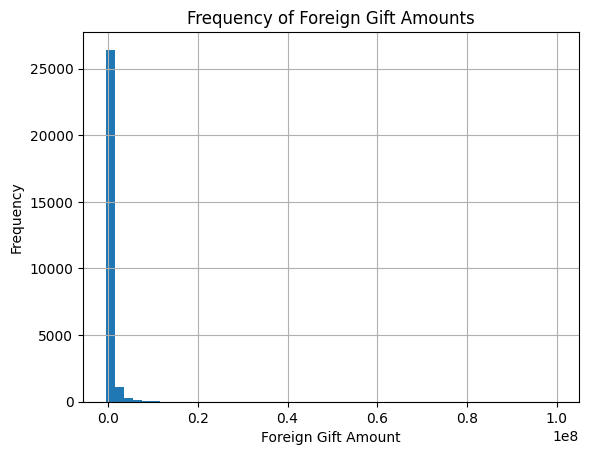

In [ ]:
#Q4.2

#Create the histogram
import matplotlib.pyplot as plt

df_gifts["Foreign Gift Amount"].hist(bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency")
plt.title("Frequency of Foreign Gift Amounts")
plt.show()

**Q4.2 Answer:**

**This histogram created of the Foreign Gift Amount variable shows that the distribution is extremely right skewed. This demonstrates that a majorit of foreign gift contributes are relatively small. As the gift amount increases, the frequency drops dramatically. Essentially, most gifts are small in size, with only a few exceptionally large gifts appearing in the dataset.**

In [ ]:
#Q4.3

#Creating value counts table
df_gifts["Gift Type"].value_counts()

,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


In [ ]:
#Q4.3

#Get proportions
df_gifts["Gift Type"].value_counts(normalize=True)

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


**Q4.3 Answer:**

**Contracts make up the majority of the gifts at 61.2%. Monetary gifts sit around 38.75%. And real estate gifts sit around 0.039% of all the gifts.**

In [ ]:
#Q4.4

#The top 15 countries by number of gifts
df_gifts.groupby("Country of Giftor").size().sort_values(ascending=False).head(15)

,0
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [ ]:
#Q4.4

#The top 15 countries by total amount given
df_gifts.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


**Q4.4 Answer:**

**The top 15 countries by number of gifts are: England, China, Canada, Japan, Switzerland, Saudi Arabia, France, Germany, Hong Kong, South Korea, Qatar, The Netherlands, Korea, India, Taiwan.**

**The top 15 countries by amount given are: Qatar, England, China, Saudi Arabia, Bermuda, Canada, Hong Kong, Japan, Switzerland, India, Germany, United Arab Emirates, France, Singapore, Australia.**

In [ ]:
#Q4.5

#Top 15 Institutions by Total Amount Received
df_gifts.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


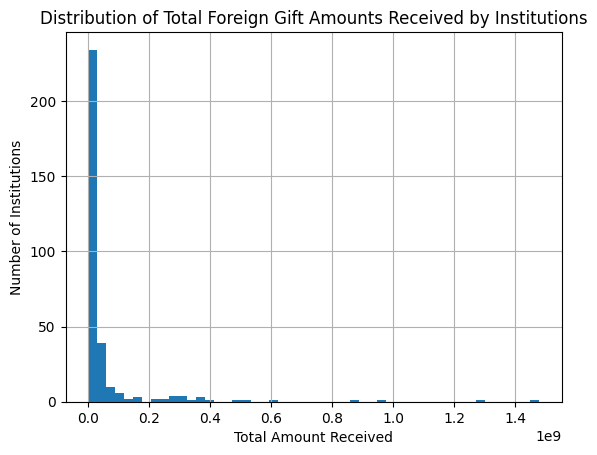

In [ ]:
#Q4.5

#Histogram of total amounts received
totals = df_gifts.groupby("Institution Name")["Foreign Gift Amount"].sum()
totals.hist(bins=50)
plt.xlabel("Total Amount Received")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Foreign Gift Amounts Received by Institutions")
plt.show()

**Q4.5 Answer:**

**The top 15 institutions by the total amount they received are: Carnegie Mellon University, Cornell University, Harvard University, Massachussets Institute of Technology, Yale University, Texas A&M University, Johns Hopkins University, Northwestern University, Georgetown University, University of Chicago, University of Colorado Boulder, Duke University, Brigham Young University, Stanford University, and University of Texas MD Anderson Cancer Center**

In [ ]:
#Q4.6

#Finding giftors who provide most amount of money
df_gifts.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q4.6 Answer:**

**Above is the list of giftors that provide the most amount of money, with Qatar Foundation being at the top!**

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [77]:
#Q5.1

#Load the dataset
import pandas as pd
df_college = pd.read_csv("/content/data/college_completion.csv")

In [78]:
#Q5.2

#Examine first few rows of data
df_college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [79]:
#Q5.2
df_college.shape

(3798, 63)

**Q5.2 Answer:**

**According to the code above, there are 3798 observations and 63 variables in the data.**

In [80]:
#Q5.3

#Cross tabulate control and level
pd.crosstab(df_college["control"], df_college["level"])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


**Q5.3 Answer:**

**There are several patterns that are worthy of noting. Firstly, Public colleges dominate in the 2-year category, with 926 public 2-year colleges versus 632 public 4-year colleges. In the opposite pattern, we see private for-profit colleges dominate in the 4-year category, with 527 private for-profit 4-year colleges, and 465 private for-profit 2-year colleges. Similarly, there are 1180 private not-for-profit colleges in the 4-year category versus 68 private not-for-profit colleges in the 2-year category. Overall, this shows that public universities are dominant in the 2-year category, whereas private universities - especially not-for-profit - dominate in the 4-year category.**

<Axes: ylabel='Density'>

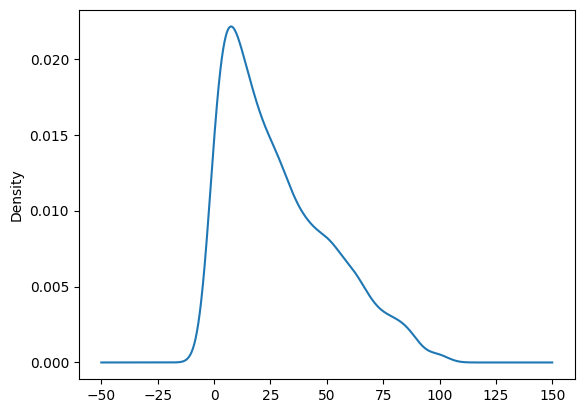

In [81]:
#Q5.4

#KDE for all institutions
df_college["grad_100_value"].plot(kind="kde")

In [82]:
#Q5.4

#Create a describe table
df_college["grad_100_value"].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


<Axes: xlabel='grad_100_value', ylabel='Density'>

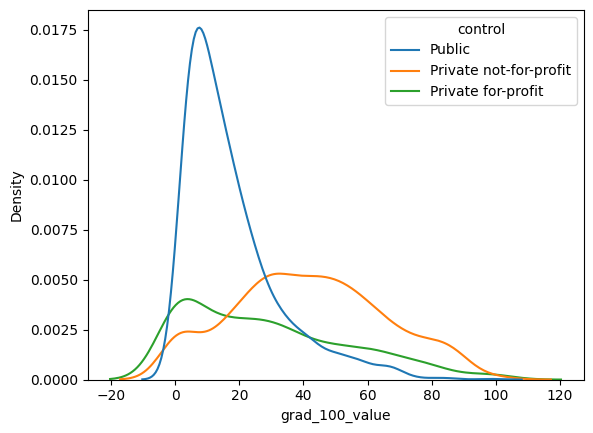

In [83]:
#Q5.4

#KDE conditioned on control
import seaborn as sns
sns.kdeplot(data=df_college, x="grad_100_value", hue="control")

In [84]:
#Q5.4

#Describe tables by control
df_college.groupby("control")["grad_100_value"].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


**Q5.4 Answer:**

**It appears that private not-for-profit institutions tend to have the most favorable graduation rates. It shown by the KDE for private not-for-profit institutions being shifted the furthest to the right. Overall, private not-for-profit institutions have a higher mean, median, and upper-quartile graduation values as compared to the other institution types.**

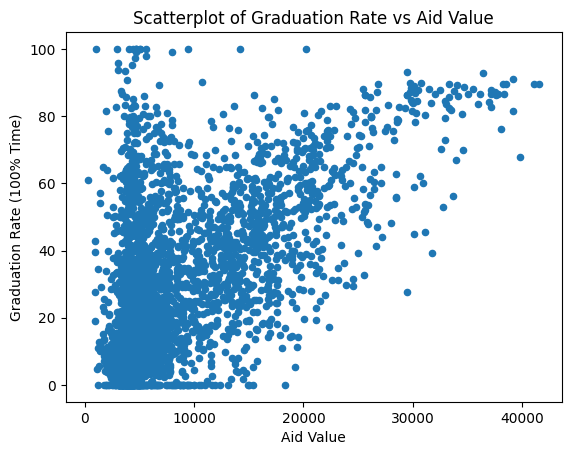

In [85]:
#Q5.5

#Scatterplot of grad_100_value by aid_value
df_college.plot(kind="scatter", x="aid_value", y="grad_100_value")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate (100% Time)")
plt.title("Scatterplot of Graduation Rate vs Aid Value")
plt.show()

In [86]:
#Q5.5

#Compute covariance
df_college[["aid_value", "grad_100_value"]].cov()

,aid_value,grad_100_value
aid_value,4.121201e+07,88610.483169
grad_100_value,8.861048e+04,543.483382


In [88]:
#Q5.5

#Compute correlation
df_college[["aid_value", "grad_100_value"]].corr()

,aid_value,grad_100_value
aid_value,1.000000,0.575879
grad_100_value,0.575879,1.000000


**Q5.5 Answer (First Part):**

**I notice in the scatterplot and computations above that

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?